# REGRESSION From Scratch With SALES PREDICTION

<img src='https://drive.google.com/uc?id=1-6z0sZc9YrK_czjy8mBQuxBj3wdD01-V' width=800 >

#### In this Notebook we will Learn:-
* Basic EDA.
* Feature Engineering
* Dealing with missing values.
* Aplly Scaling on Feature matrix.
* Dealing with Categorical Dataset.
* Dimensionality Reduction (PCA) .
* K-Cross validation to check accuracy.
* Multi-linear Regression
* Random Forest Regressor
* Polynomial Regression
* Prediction on new Values.

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, download_plotlyjs, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Importing the datasets
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [6]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
df_train.shape

(8523, 12)

In [9]:
df_test.shape

(5681, 11)

# BASIC ANALYSIS AND FEATURES ENGINEERING

#### 1). Removing Unwanted Columns/Features.

In [10]:
try:
    df_train.drop(labels=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)
    df_test.drop(labels=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)
except Exception as e:
    pass

In [11]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


#### 2). Getting Information about Null values,

In [12]:
temp_df = df_train.isnull().sum().reset_index()
temp_df['Percentage'] = (temp_df[0]/len(df_train))*100
temp_df.columns = ['Column Name', 'Number of null values', 'Null values in percentage']
print(f"The length of dataset is \t {len(df_train)}")
temp_df

The length of dataset is 	 8523


,Column Name,Number of null values,Null values in percentage
0,Item_Weight,1463,17.165317
1,Item_Fat_Content,0,0.000000
2,Item_Visibility,0,0.000000
3,Item_Type,0,0.000000
4,Item_MRP,0,0.000000
5,Outlet_Size,2410,28.276428
6,Outlet_Location_Type,0,0.000000
7,Outlet_Type,0,0.000000
8,Item_Outlet_Sales,0,0.000000


* So it is clear that we do not have to remove null values, as they 28% and 17% in the Outlet_Size and Item_Weight Columns respectively.
* Null values are in less quantity.
* We will replace them later with thier mean or mode values.

#### 3). Making Correction in 'Item_Fat_Content' column.

In [13]:
def convert(x):
    if x in ['low fat', 'LF']: 
        return 'Low Fat'
    elif x=='reg':
        return 'Regular'
    else:
        return x

df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].apply(convert)
df_test['Item_Fat_Content'] = df_train['Item_Fat_Content'].apply(convert)

print(f"Now Unique values in this column in Train Set are\t  {df_train['Item_Fat_Content'].unique()} ")
print(f"Now Unique values in this column in Test Set are\t  {df_test['Item_Fat_Content'].unique()} ")

Now Unique values in this column in Train Set are	  ['Low Fat' 'Regular'] 
Now Unique values in this column in Test Set are	  ['Low Fat' 'Regular'] 


#### 4). Dealing with the Missing Values in Categorical type column i.e. 'Outlet_Size'

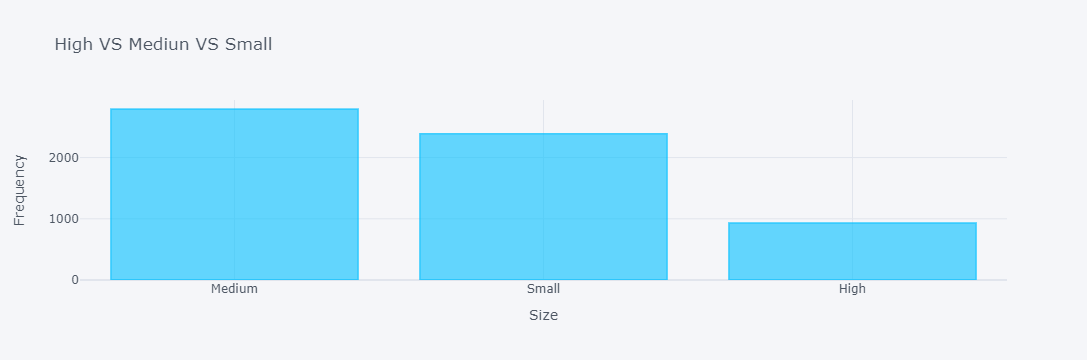

In [14]:
# Counting the values
count = df_train['Outlet_Size'].value_counts().reset_index()
count.iplot(kind='bar', color='deepskyblue', x='index', y='Outlet_Size', title='High VS Mediun VS Small',
           xTitle='Size', yTitle='Frequency')


* We will remove the missing values from 'Medium' in both Training set and Test set.

In [15]:
df_train['Outlet_Size'].fillna(value='Medium', inplace= True)
df_test['Outlet_Size'].fillna(value='Medium', inplace= True)

### ===============================================================================

# PREDICTION WITH REGRESSION MODELS.

In [16]:
# Let us Import the Important Libraries  to train our Model for Machine Learning 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder, OneHotEncoder # To deal with Categorical Data in Target Vector.
from sklearn.model_selection import train_test_split  # To Split the dataset into training data and testing data.
from sklearn.model_selection import cross_val_score   # To check the accuracy of the model.
from sklearn.preprocessing import StandardScaler   # To appy scaling on the dataset.

In [17]:
# Let us create feature matrix and Target Vector.
x_train = df_train.iloc[:, :-1].values    # Features Matrix
y_train = df_train.iloc[:,-1].values   # Target Vector
x_test = df_test.values    # Features Matrix

In [18]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


### 1). Dealing with Missing data.

In [19]:
imputer = SimpleImputer()
x_train[:,[0]] = imputer.fit_transform(x_train[:,[0]])
x_test[:,[0]] = imputer.fit_transform(x_test[:,[0]])


### 2). Dealing With the Categorical Values in Features/Columns.

In [20]:
labelencoder_x = LabelEncoder()
x_train[:, 1 ] = labelencoder_x.fit_transform(x_train[:,1 ])
x_train[:, 3 ] = labelencoder_x.fit_transform(x_train[:,3 ])
x_train[:, 5 ] = labelencoder_x.fit_transform(x_train[:,5 ])
x_train[:, 6 ] = labelencoder_x.fit_transform(x_train[:,6 ])
x_train[:, 7 ] = labelencoder_x.fit_transform(x_train[:,7 ])


# Let's apply same concept on test set.
x_test[:, 1 ] = labelencoder_x.fit_transform(x_test[:,1 ])
x_test[:, 3 ] = labelencoder_x.fit_transform(x_test[:,3 ])
x_test[:, 5 ] = labelencoder_x.fit_transform(x_test[:,5 ])
x_test[:, 6 ] = labelencoder_x.fit_transform(x_test[:,6 ])
x_test[:, 7 ] = labelencoder_x.fit_transform(x_test[:,7 ])


#this is need to done when we have more than two categorical values.

### 3). Now time to Apply Feature Scaling on Feature matrix .

In [21]:
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

### 4). DIMENSIONALITY REDUCTION
* We are doing this to reduce the number of dimensions/features in the dataset.
* The features which have less effect on the prediction , we will remove those features.
* It also boosts the process.
* It saves time.
* Here we will use Principal Component Analysis (PCA) with 'rbf' kernel.

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.2363081 , 0.13896363, 0.1295007 , 0.12312627, 0.12099042,
       0.11654579, 0.09634173, 0.03822336])

* Here we will take n_component = 24.

In [23]:
pca = PCA(n_components=8)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

### 5). Apply Multi-Linear Regression Model, Polynomial Regression and Random Forest Model and compare thier accuracy and pick the best one.

#### Multi-Linear Regression

In [24]:
# Multi-linear regression Model.
regressor_multi = LinearRegression()
regressor_multi.fit(x_train,y_train)

# Let us check the accuray
accuracy_multi = cross_val_score(estimator=regressor_multi, X=x_train, y=y_train,cv=10)
print('\n-------------Multi linear Regression----------')
print(f"The accuracy of the Multi-linear Regressor Model is \t {accuracy_multi.mean()}")
print(f"The deviation in the accuracy is \t {accuracy_multi.std()}")

The accuracy of the Multi-linear Regressor Model is 	 0.5055107328043837
The deviation in the accuracy is 	 0.022315685398043694


#### Random Forest Model

In [25]:
# Random Forest Model.
regressor_random = RandomForestRegressor(n_estimators=100,)
regressor_random.fit(x_train,y_train)

# Let us check the accuray
accuracy_rforest = cross_val_score(estimator=regressor_random, X=x_train, y=y_train,cv=10)
print('\n---------------Random Forest Model----------')
print(f"The accuracy of the Random Forest Model is \t {accuracy_rforest.mean()}")
print(f"The deviation in the accuracy is \t {accuracy_rforest.std()}") 


The accuracy of the Random Forest Model is 	 0.554903898489399
The deviation in the accuracy is 	 0.03322319536668427


#### Polynomial regression

In [26]:

# Fitting polynomial regression to dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4) #These 3 steps are to convert X matrix into X polynomial
x_poly=poly_reg.fit_transform(x_train) #matrix. 
regressor_poly=LinearRegression()
regressor_poly.fit(x_poly,y_train)

# Let us check the accuray
accuracy_poly = cross_val_score(estimator=regressor_poly, X=x_train, y=y_train,cv=10)
print('\n----------------Polynomial Regression-----------')
print(f"The accuracy of the Polynomial Regression Model is \t {accuracy_poly.mean()}")
print(f"The deviation in the accuracy is \t {accuracy_poly.std()}")

The accuracy of the Polynomial Regression Model is 	 0.5055107328043837
The deviation in the accuracy is 	 0.022315685398043694


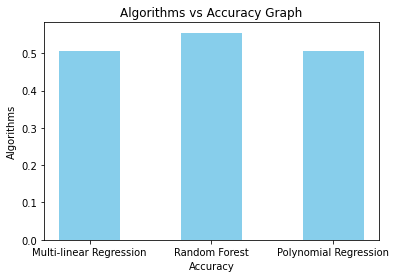

In [27]:
# Bar graph for all the three algorithms
algorithms = ['Multi-linear Regression', 'Random Forest', 'Polynomial Regression']
results = [accuracy_multi.mean(), accuracy_rforest.mean(), accuracy_poly.mean() ]
plt.bar(algorithms, results, color ='skyblue', width = 0.5)
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
plt.title('Algorithms vs Accuracy Graph')
plt.show()

#### observation:-
* As the accuracy of Multi-linear regression Model is the best one.
* Multi-linear Regression Model takes less time as compare to Random forest and Polynomial regression Models.
* We will choose Multi-linear regression Model.
* Here we are getting the accuracy of 55% and deviation of 2%, means in future if we mak eprediction on new values then we will get the accuracy in range 53% to 57%.
* We are getting low accuracy due to less quantity of data.

### Let us make Prediction on test set

In [28]:
y_pred = regressor_multi.predict(x_test)

y_pred[:5]

array([3322.50895254,  774.8746778 , 1562.67151982, -329.8946799 ,
       4671.23186286])